## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from src.util import catgvssale,contvssale,contvscont,check_column_skewness,remove_skewness,plot_contv,remove_ngskewness,preprocess_dataset
from datetime import datetime
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
final_df = pd.read_csv('data/raw/train.csv')
df1 =  pd.read_csv('data/raw/train.csv')
lbl_dsc = pd.read_csv('data\clean\label_description.csv')
var_dsc =  pd.read_csv('data/clean/variable_description.csv')

In [3]:
var_dsc

,variable,variable_type,variable_description
0,MSSubClass,Nominal,Identifies the type of dwelling involved in t...
1,MSZoning,Nominal,Identifies the general zoning classification ...
2,LotFrontage,Continuous,Linear feet of street connected to property
3,LotArea,Continuous,Lot size in square feet
4,Street,Nominal,Type of road access to property
...,...,...,...
75,MoSold,Discrete,Month Sold (MM)
76,YrSold,Discrete,Year Sold (YYYY)
77,SaleType,Nominal,Type of sale
78,SaleCondition,Nominal,Condition of sale


In [4]:
nominal_df = var_dsc.loc[var_dsc['variable_type'] == 'Nominal']
#print(ordinal_df)
nominal_df.head(30)

,variable,variable_type,variable_description
0,MSSubClass,Nominal,Identifies the type of dwelling involved in t...
1,MSZoning,Nominal,Identifies the general zoning classification ...
4,Street,Nominal,Type of road access to property
5,Alley,Nominal,Type of alley access to property
7,LandContour,Nominal,Flatness of the property
9,LotConfig,Nominal,Lot configuration
11,Neighborhood,Nominal,Physical locations within Ames city limits
12,Condition1,Nominal,Proximity to various conditions
13,Condition2,Nominal,Proximity to various conditions (if more than...
14,BldgType,Nominal,Type of dwelling


In [5]:
ordinal_df = var_dsc.loc[var_dsc['variable_type'] == 'Ordinal']
#print(ordinal_df)
ordinal_df.head(24)

,variable,variable_type,variable_description
6,LotShape,Ordinal,General shape of property
8,Utilities,Ordinal,Type of utilities available
10,LandSlope,Ordinal,Slope of property
16,OverallQual,Ordinal,Rates the overall material and finish of the ...
17,OverallCond,Ordinal,Rates the overall condition of the house
26,ExterQual,Ordinal,Evaluates the quality of the material on the ...
27,ExterCond,Ordinal,Evaluates the present condition of the materi...
29,BsmtQual,Ordinal,Evaluates the height of the basement
30,BsmtCond,Ordinal,Evaluates the general condition of the basement
31,BsmtExposure,Ordinal,Refers to walkout or garden level walls


In [6]:
cont_df = var_dsc.loc[var_dsc['variable_type'] == 'Continuous']
cont_df

,variable,variable_type,variable_description
2,LotFrontage,Continuous,Linear feet of street connected to property
3,LotArea,Continuous,Lot size in square feet
25,MasVnrArea,Continuous,Masonry veneer area in square feet
33,BsmtFinSF1,Continuous,Type 1 finished square feet
35,BsmtFinSF2,Continuous,Type 2 finished square feet
36,BsmtUnfSF,Continuous,Unfinished square feet of basement area
37,TotalBsmtSF,Continuous,Total square feet of basement area
42,1stFlrSF,Continuous,First Floor square feet
43,2ndFlrSF,Continuous,Second floor square feet
44,LowQualFinSF,Continuous,Low quality finished square feet (all floors)


In [7]:
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
cont_list = cont_df['variable'].to_list()
def main_fun(data,cont_list):
    
    for i in cont_list:
        column_values = data[i]
        skewness = column_values.skew()
        if abs(skewness) > 1:
            
            column_values = np.log1p(column_values)

        
        data[i] = column_values
    return data 

#cont_list = cont_df['variable'].to_list()
main_fun(final_df, cont_list)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal,12.247699
1,2,20,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal,12.109016
2,3,60,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal,12.317171
3,4,70,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml,11.849405
4,5,60,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.143135,8.976894,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,8,2007,WD,Normal,12.072547
1456,1457,20,RL,4.454347,9.486152,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.000000,2,2010,WD,Normal,12.254868
1457,1458,70,RL,4.204693,9.109746,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,GdPrv,Shed,7.824446,5,2010,WD,Normal,12.493133
1458,1459,20,RL,4.234107,9.181735,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,4,2010,WD,Normal,11.864469


## columns to drop 

In [9]:
column_to_drop = ['PoolQC','MiscFeature','Alley','Fence']
final_df = final_df.drop(['MiscFeature','Alley','Fence'],axis=1)
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,0.000000,2,2008,WD,Normal,12.247699
1,2,20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,NaN,0.000000,5,2007,WD,Normal,12.109016
2,3,60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,0.000000,9,2008,WD,Normal,12.317171
3,4,70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,NaN,0.000000,2,2006,WD,Abnorml,11.849405
4,5,60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,NaN,0.000000,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.143135,8.976894,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,0.000000,8,2007,WD,Normal,12.072547
1456,1457,20,RL,4.454347,9.486152,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,0.000000,2,2010,WD,Normal,12.254868
1457,1458,70,RL,4.204693,9.109746,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,7.824446,5,2010,WD,Normal,12.493133
1458,1459,20,RL,4.234107,9.181735,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,NaN,0.000000,4,2010,WD,Normal,11.864469


In [10]:
#ordinal_df = ordinal_df.drop(['PoolQC'],axis=0)
ordinal_df

,variable,variable_type,variable_description
6,LotShape,Ordinal,General shape of property
8,Utilities,Ordinal,Type of utilities available
10,LandSlope,Ordinal,Slope of property
16,OverallQual,Ordinal,Rates the overall material and finish of the ...
17,OverallCond,Ordinal,Rates the overall condition of the house
26,ExterQual,Ordinal,Evaluates the quality of the material on the ...
27,ExterCond,Ordinal,Evaluates the present condition of the materi...
29,BsmtQual,Ordinal,Evaluates the height of the basement
30,BsmtCond,Ordinal,Evaluates the general condition of the basement
31,BsmtExposure,Ordinal,Refers to walkout or garden level walls


In [7]:
ordinal_list = ordinal_df['variable'].to_list()
print(ordinal_list)
l = len(ordinal_list)
print(l)
ordinal_list.remove("PoolQC")
ordinal_list.remove("Fence")
print(ordinal_list)

['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
23
['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [8]:
cont_list = cont_df['variable'].to_list()
print(cont_list)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [9]:
nominal_list = nominal_df['variable'].to_list()
print(nominal_list)
nominal_list.remove("MiscFeature")
nominal_list.remove("Alley")
nominal_list.remove("MSSubClass")
print(nominal_list)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition']


In [14]:
notnum_list = cont_list + ordinal_list

print(notnum_list)


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [11]:
ordinal_vars = ordinal_list
continuous_vars = cont_list
nominal_vars =  nominal_list


In [16]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
df1 = df1.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
df1.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## labelencoding for ordinal data types

In [19]:
def label_encode_dataset(dataset, ordinal_vars):
    label_encoder = LabelEncoder()

    for col in ordinal_vars:
        dataset[col] = label_encoder.fit_transform(dataset[col])

    return dataset

encoded_data = label_encode_dataset(df1, ordinal_vars)
print(encoded_data)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape   
0        1          60       RL         65.0     8450   Pave         3  \
1        2          20       RL         80.0     9600   Pave         3   
2        3          60       RL         68.0    11250   Pave         0   
3        4          70       RL         60.0     9550   Pave         0   
4        5          60       RL         84.0    14260   Pave         0   
...    ...         ...      ...          ...      ...    ...       ...   
1455  1456          60       RL         62.0     7917   Pave         3   
1456  1457          20       RL         85.0    13175   Pave         3   
1457  1458          70       RL         66.0     9042   Pave         3   
1458  1459          20       RL         68.0     9717   Pave         3   
1459  1460          20       RL         75.0     9937   Pave         3   

     LandContour  Utilities LotConfig  ...  EnclosedPorch 3SsnPorch   
0            Lvl          0    Inside  .

## one hot encoding for nominal data 

In [20]:


def one_hot_encode_nominal(dataset, nominal_vars):
    encoded_dataset = dataset.copy()

    for var in nominal_vars:
        # Perform one-hot encoding
        encoded_columns = pd.get_dummies(encoded_dataset[var], prefix=var, drop_first=True)
        encoded_columns = encoded_columns.astype(int)
        encoded_dataset = pd.concat([encoded_dataset, encoded_columns], axis=1)
        encoded_dataset.drop(columns=var,inplace=True)
        
    return encoded_dataset


encoded_data = one_hot_encode_nominal(encoded_data, nominal_vars)
print(encoded_data)



        Id  MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope   
0        1          60         65.0     8450         3          0          0  \
1        2          20         80.0     9600         3          0          0   
2        3          60         68.0    11250         0          0          0   
3        4          70         60.0     9550         0          0          0   
4        5          60         84.0    14260         0          0          0   
...    ...         ...          ...      ...       ...        ...        ...   
1455  1456          60         62.0     7917         3          0          0   
1456  1457          20         85.0    13175         3          0          0   
1457  1458          70         66.0     9042         3          0          0   
1458  1459          20         68.0     9717         3          0          0   
1459  1460          20         75.0     9937         3          0          0   

      OverallQual  OverallCond  YearBui

In [21]:
temp = one_hot_encode_nominal(encoded_data,ordinal_vars)
print(temp)

        Id  MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd   
0        1          60         65.0     8450       2003          2003  \
1        2          20         80.0     9600       1976          1976   
2        3          60         68.0    11250       2001          2002   
3        4          70         60.0     9550       1915          1970   
4        5          60         84.0    14260       2000          2000   
...    ...         ...          ...      ...        ...           ...   
1455  1456          60         62.0     7917       1999          2000   
1456  1457          20         85.0    13175       1978          1988   
1457  1458          70         66.0     9042       1941          2006   
1458  1459          20         68.0     9717       1950          1996   
1459  1460          20         75.0     9937       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageQual_3   
0          196.0         706           0        1

## log transform for continuous variables

In [22]:


def log_transform_continuous(dataset, continuous_vars):
    transformed_dataset = dataset.copy()

    for var in continuous_vars:
        # Compute skewness
        skewness = skew(transformed_dataset[var])

        if skewness > 1:
            # Perform log transform
            transformed_dataset[var] = np.log1p(transformed_dataset[var])

    return transformed_dataset



final_data = log_transform_continuous(temp, continuous_vars)
print(final_data)


        Id  MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd   
0        1          60         65.0  9.042040       2003          2003  \
1        2          20         80.0  9.169623       1976          1976   
2        3          60         68.0  9.328212       2001          2002   
3        4          70         60.0  9.164401       1915          1970   
4        5          60         84.0  9.565284       2000          2000   
...    ...         ...          ...       ...        ...           ...   
1455  1456          60         62.0  8.976894       1999          2000   
1456  1457          20         85.0  9.486152       1978          1988   
1457  1458          70         66.0  9.109746       1941          2006   
1458  1459          20         68.0  9.181735       1950          1996   
1459  1460          20         75.0  9.204121       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageQual_3   
0          196.0    6.561031    0.000

In [23]:
columnindex = final_data.columns.get_loc('SalePrice')
print(columnindex)

35


## Aggregate of all three functions

In [24]:
def preprocess_dataset(dataset, continuous_vars, nominal_vars, ordinal_vars):
    transformed_dataset = log_transform_continuous(dataset, continuous_vars)
    encoded_dataset = one_hot_encode_nominal(transformed_dataset, nominal_vars)
    preprocessed_dataset = label_encode_dataset(encoded_dataset, ordinal_vars)
    
    return preprocessed_dataset

## splitting the data

In [25]:
X1 = final_data.iloc[:,0:35]
y = final_data.iloc[:,35]
X2 = final_data.iloc[:,36:262]
X = pd.concat([X1,X2],axis=1)
X = X.fillna(0)
X


,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_1,PavedDrive_2
0,1,60,65.0,9.042040,2003,2003,196.0,6.561031,0.000000,150,...,0,1,0,0,0,0,1,0,0,1
1,2,20,80.0,9.169623,1976,1976,0.0,6.886532,0.000000,284,...,0,1,0,0,0,0,1,0,0,1
2,3,60,68.0,9.328212,2001,2002,162.0,6.188264,0.000000,434,...,0,1,0,0,0,0,1,0,0,1
3,4,70,60.0,9.164401,1915,1970,0.0,5.379897,0.000000,540,...,0,1,0,0,0,0,1,0,0,1
4,5,60,84.0,9.565284,2000,2000,350.0,6.486161,0.000000,490,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,8.976894,1999,2000,0.0,0.000000,0.000000,953,...,0,1,0,0,0,0,1,0,0,1
1456,1457,20,85.0,9.486152,1978,1988,119.0,6.673298,5.099866,589,...,0,1,0,0,0,0,1,0,0,1
1457,1458,70,66.0,9.109746,1941,2006,0.0,5.620401,0.000000,877,...,0,1,0,0,0,0,1,0,0,1
1458,1459,20,68.0,9.181735,1950,1996,0.0,3.912023,6.937314,0,...,0,1,0,0,0,0,1,0,0,1


In [26]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## linear regression with the mutual info data

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)

# Apply SelectKBest feature selection
k = 200 # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


# Get selected feature names
#selected_feature_names = X.columns[selector.get_support()].tolist()

# Fit a linear regression model using the selected features
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

## LinearReg : save the model

In [28]:
#filename = 'lineareg_modelexp.sav'
#pickle.dump(linear_regression, open(filename, 'wb'))

In [29]:
y_pred = linear_regression.predict(X_test)


In [30]:
y_predsp = np.expm1(y_pred)
y_predsp

array([146000.71875479, 332994.06507328, 112008.31663355, 170122.51937031,
       332385.02869306,  77666.87902638, 263046.79326975, 140966.11853683,
        74898.28720103, 141472.41133589, 152319.69551207, 115340.58240036,
        78678.34911887, 207664.29463678, 178143.54865861, 135277.6970639 ,
       189585.04354718, 134159.33579664, 104439.13306193, 210952.46581645,
       163596.86010323, 210106.18928969, 179537.96588699, 133926.29982581,
       197372.63975108, 157640.55564164, 193420.88263379, 113119.10169237,
       176853.50903981, 205840.65389101, 157007.09073565, 265472.97018418,
       184987.61787798, 119867.41115689, 254766.49438716, 142329.88000742,
       155603.03491006, 200991.36825271, 353930.35986661, 104565.18861409,
       123593.12367285, 232164.62112276, 111082.35796971, 319922.67803655,
       129844.35301504, 142049.88362548, 106181.09442296, 129212.69641807,
       440059.09122187, 142078.79909763, 119924.00377185, 199841.00705109,
       103499.85299847, 2

In [31]:
y_testsp = np.expm1(y_test)
#print(sp)

In [32]:
#y_testsp.shape
y_predsp.shape

(438,)

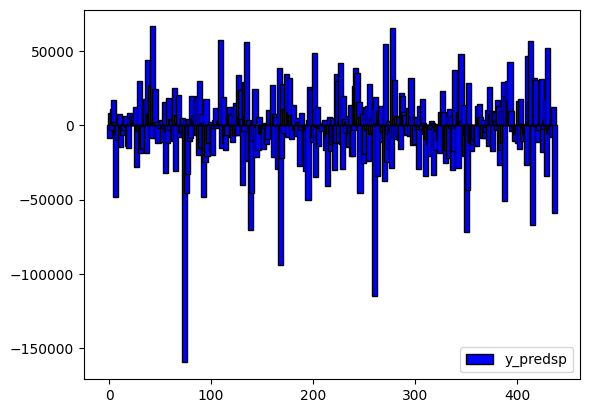

In [33]:
n=438
r = np.arange(n)
width = 1.5
diff = y_predsp-y_testsp
bar1 = plt.bar( r , diff, width= 5,color = 'b',edgecolor = 'black' , label = 'y_predsp')
#bar2 = plt.bar(r + width, y_testsp, width = 5,color = 'g',edgecolor = 'black',label = 'y_testsp')
plt.legend()
plt.show()


In [34]:
df1['SalePrice'].iloc[892]

154500

In [35]:
mse = mean_squared_error(y_testsp, y_predsp)
r2 = r2_score(y_testsp, y_predsp)
rmse = mean_squared_error(y_testsp, y_predsp,squared=False)
print("Mean Squared Error (RMSE) on train set:", mse)
print("Root Mean Squared Error (MSE) on train set:", rmse)
print("R-squared score on train set:", r2)

Mean Squared Error (RMSE) on train set: 485923330.62976456
Root Mean Squared Error (MSE) on train set: 22043.66871983347
R-squared score on train set: 0.9303644595104501


In [36]:
le = round(linear_regression.score(X_test,y_test), 2)
print(le)

0.92


with k = 50.mse = 3.408924337252029e-32 on the test data.smallest value of mse.

with k = 100 mse = 1.6952560948258837e-29 on the test data.

with k = 200 mse = 3.3458167857940476e-28 on the test data. larger value of mse

with k = 261 mse = 6.126583433723093e-28 on the test data

## performing cross validation to reduce the rmse value

In [37]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


In [38]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


In [39]:
model = LinearRegression()
scores = cross_val_score(model, X_selected, y, scoring='neg_mean_squared_error', cv=kf)
print(scores)

[-0.01390078 -0.0148819  -0.02939599 -0.0190562  -0.01197164]


## randomforest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,random_state=0,oob_score=True)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [41]:
X_train.shape

(1022, 200)

In [42]:
Y_pred = regressor.predict(X_test)

In [43]:
Y_predsp = np.expm1(Y_pred)
Y_testsp = np.expm1(y_test)

In [44]:
rg = regressor.score(X_test,y_test)
print(rg)

0.8723144721504859


In [45]:
print(regressor.oob_score_)

0.8497498639447946


In [46]:
r2 = r2_score(Y_testsp, Y_predsp)
rmse = mean_squared_error(Y_testsp, Y_predsp,squared=False)
print("R-squared score on train set:", r2)
print("Root Mean Squared Error (MSE) on train set:", rmse)

R-squared score on train set: 0.8771121969746305
Root Mean Squared Error (MSE) on train set: 29283.48701208361


In [47]:
#filename = 'models/randomforestreg_modelexp1.sav'
#pickle.dump(regressor, open(filename, 'wb'))

## model Linear Regression

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = linear_regression.predict(X_test)
y_pred

array([11.91481616, 12.76613287, 11.56418412, 12.07079985, 12.68400588,
       11.28746836, 12.4664232 , 11.90846221, 11.23964036, 11.8745827 ,
       11.90299682, 11.66438582, 11.24380333, 12.23099565, 12.06179502,
       11.79401072, 12.14911208, 11.80178724, 11.60378094, 12.27595368,
       11.99462724, 12.26655372, 12.05240825, 11.79458497, 12.1948426 ,
       11.94518918, 12.16738666, 11.65897167, 12.10846911, 12.18048985,
       11.95237354, 12.4918149 , 12.15529589, 11.6806499 , 12.45568681,
       11.87915744, 11.88642335, 12.18326969, 12.71006398, 11.6575314 ,
       11.69983683, 12.28454454, 11.60788088, 12.76949929, 11.77187522,
       11.75069362, 11.52693137, 11.79831104, 13.06741845, 11.86796058,
       11.66402938, 12.24086274, 11.50686937, 12.63603073, 11.95909202,
       12.3738389 , 12.22981346, 11.94914702, 11.71975077, 11.52755609,
       11.22541211, 12.0384418 , 12.63258942, 12.44913052, 12.62429556,
       12.21262205, 11.67359252, 12.6498914 , 11.9538629 , 12.05

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared score on test set:", r2)

Mean Squared Error (MSE) on test set: 0.024282014358500293
R-squared score on test set: 0.8568648304745705


In [52]:
intercept = linear_regression.intercept_
coefficients = linear_regression.coef_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 0.9323760535682055
Coefficients: [-1.47854241e-06  5.11805450e-05  2.25066674e-05  8.12649960e-02
  2.23908880e-03  1.19944298e-03  1.77415371e-05  3.44752496e-03
  7.39199764e-03 -3.98769626e-05  1.25122320e-01  1.83171053e-02
  7.55158760e-05 -3.71587165e-03  3.30304649e-01  2.26634821e-02
  5.06551609e-03  1.61648138e-02  1.47297810e-02  8.28056844e-03
 -7.36107859e-02  6.20375652e-04  1.88499046e-02 -2.86968227e-04
  2.09087382e-02  1.18304004e-04  2.93213023e-03  3.76311886e-03
  4.34877368e-03  7.86523350e-03  8.66008433e-03  1.85952866e-02
 -4.35334725e-03 -5.82277724e-04 -1.09879239e-03  4.19873678e-01
  3.84210355e-01  3.56846067e-01  3.33688917e-01  2.15476696e-02
  4.49376964e-02  6.85071067e-03  3.11515181e-02  1.39081149e-02
 -6.03423279e-02 -1.33104197e-01 -1.24155984e-02 -4.72340826e-02
 -1.99021046e-02 -2.93725113e-02 -3.92102470e-02 -5.60034466e-02
  5.59825973e-02 -1.19748590e-01 -4.89363496e-02 -1.10365571e-01
 -1.47995843e-01 -7.77083633e-02 -8.77281126e-

In [53]:
predictions = linear_regression.predict(X)
r2 = r2_score(y, predictions)
print("R-squared score:", r2)

R-squared score: 0.921909227700066


## svm regression

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.svm import SVR
svm_regression = SVR()

In [56]:
svm_regression.fit(X_train, y_train)

SVR()

In [57]:
y_pred = svm_regression.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared score on test set:", r2)

Mean Squared Error (MSE) on test set: 0.06983288204850825
R-squared score on test set: 0.5883561691839845
